# A/B Test for MuscleHub
***

## Introduction

Like most businesses, Janet keeps her data in a SQL database. You have already downloaded the data from her database to a csv file, and will load it into a Jupyter Notebook using pandas to conduct A/B testing for the MuscleHub Gym.

Let's get started!

## Import the dataset

Janet of MuscleHub has a SQLite database, which contains several tables that will be helpful to you in this investigation. You have already created a csv file for each table.

Import the four csv files as pandas DataFrames and examine them. 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
visits = pd.read_csv('visits.csv', parse_dates=['visit_date'])
applications = pd.read_csv('applications.csv')
fitness_tests = pd.read_csv('fitness_tests.csv')
purchases = pd.read_csv('purchases.csv')

visits.head()




,first_name,last_name,email,gender,visit_date
0,Karen,Manning,Karen.Manning@gmail.com,female,2017-05-01
1,Annette,Boone,AB9982@gmail.com,female,2017-05-01
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,2017-05-01
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,2017-05-01
4,Andre,Mayer,AndreMayer90@gmail.com,male,2017-05-01


## Join all of your data

It would be helpful to have a single DataFrame with all of this data. 

Create a DataFrame containing all of this data. Keep in mind that not all visits in **visits.csv** occurred during the A/B test. You’ll only want to pull data where `visit_date` is on or after 7-1-17.


You'll need the following columns:

* `visits.first_name`
* `visits.last_name`
* `visits.gender`
* `visits.email`
* `visits.visit_date`
* `fitness_tests.fitness_test_date`
* `applications.application_date`
* `purchases.purchase_date`

In [12]:
# Merging all files to create a full profile for people after 7-1-17
visits_in_test = visits.loc[visits.visit_date >= '2017-7-1']
all_data = pd.merge(visits_in_test, fitness_tests, how='left')\
.merge(applications, how='left').merge(purchases, how='left')
all_data.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date
0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-01,2017-07-03,NaN,NaN
1,Tom,Webster,TW3857@gmail.com,male,2017-07-01,2017-07-02,NaN,NaN
2,Edward,Bowen,Edward.Bowen@gmail.com,male,2017-07-01,NaN,2017-07-04,2017-07-04
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01,2017-07-01,2017-07-03,2017-07-05
4,Roberta,Best,RB6305@hotmail.com,female,2017-07-01,2017-07-02,NaN,NaN


## Visualize the Groups

Having compiled the DataFrame we can use to begin our project.

Make at least one visualization that depicts the distribution of potential customers that were given a fitness test and those that were not:
- Create a bar plot of the test group variable's distribution.
- Create a pie cart using `plt.pie()`.

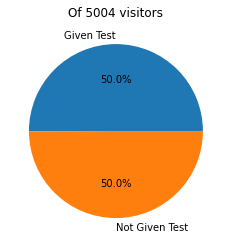

In [13]:
# Simply taking all visitors and deviding them into two groups, based on if they did a fitness test.
given_test = all_data[all_data.fitness_test_date.notnull()]
not_given_test = all_data[all_data.fitness_test_date.isnull()]

plt.pie([len(given_test), len(not_given_test)], labels=['Given Test', 'Not Given Test'], \
        autopct='%0.1f%%')
plt.title('Of {} visitors'.format(str(len(all_data))))
plt.show()

## Determine the count of applications

Recall that the sign-up process for MuscleHub has several steps:

1. Take a fitness test with a personal trainer (only Group A).
2. Fill out an application for the gym.
3. Send in their payment for their first month's membership.

Determine the percentage of people in each group who complete Step 2, filling out an application.

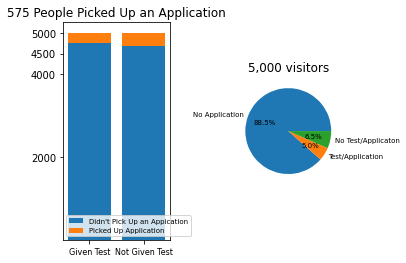

575

In [51]:
# Visual comparison of who actually decided to pick up an applicaation.
# Of 575 people who picked up an application, 43.5% did a fitness test and 56.5% did not.
tested_and_app = given_test[given_test.application_date.notnull()]
notest_and_app = not_given_test[not_given_test.application_date.notnull()]
null_apps = [(len(all_data) - len(tested_and_app)), (len(all_data) - len(notest_and_app))]
apps = [len(tested_and_app), len(notest_and_app)]

plt.figure(figsize=(5,4))
plt.subplot(1,2,1)
plt.bar(range(len(null_apps)), null_apps)
plt.bar(range(len(apps)), apps, bottom=null_apps)
plt.legend(["Didn't Pick Up an Appication", "Picked Up Application"], fontsize=7)
plt.title('575 People Picked Up an Application')

ap = plt.subplot(1,2,1)
ap.set_xticks(range(2))
ap.set_xticklabels(['Given Test', 'Not Given Test'], fontsize=8)
ap.set_yticks([2000, 4000, 4500, 5000])

plt.subplot(1,2,2)
plt.pie([len(all_data[all_data.application_date.isnull()]), len(tested_and_app), \
         len(notest_and_app)], labels=['No Application', 'Test/Application', \
                                       'No Test/Applicaton'], \
        autopct='%0.1f%%', textprops={'fontsize': 7})
plt.title('5,000 visitors')
plt.subplots_adjust(wspace=.6)

plt.show()
len(tested_and_app) + len(notest_and_app)

It looks like more people from Group B turned in an application.  Why might that be?

We need to know if this difference is statistically significant.

## Calculate the statistical significance of applications

Having calculated the difference in who turned in an application between groups, determine if this difference is statistically significant.

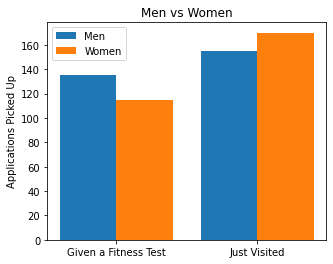

In [52]:
# With not a lot of subjective imformation given, the main difference is going to come from gender.
tested_app_men = tested_and_app[tested_and_app.gender == 'male']
notest_app_men = notest_and_app[notest_and_app.gender == 'male']
tested_app_women = tested_and_app[tested_and_app.gender == 'female']
notest_app_women = notest_and_app[notest_and_app.gender == 'female']

# This function returns a compressed list of x ticks for bars to be placed side by side
# n = The dataset we're on
# t = Number of datasets
# d = Number of sets of bars
# w = Width of each bar
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

men_x = create_x(2, .8, 1, 2)
women_x = create_x(2, .8, 2, 2)
men_women_x = [(a + b) / 2.0 for a, b in zip(men_x, women_x)]

men_app = [len(tested_app_men), len(notest_app_men)]
women_app = [len(tested_app_women), len(notest_app_women)]


plt.figure(figsize=(5,4))
plt.bar(men_x, men_app)
plt.bar(women_x, women_app)

applic = plt.subplot(1,1,1)
applic.set_xticks(men_women_x)
applic.set_xticklabels(['Given a Fitness Test', 'Just Visited'])
plt.ylabel('Applications Picked Up')
plt.title('Men vs Women')
plt.legend(['Men', 'Women'])

# Not getting tested definitly makes a difference overall, but seems to have a much more 
# drastic difference on women than men
plt.show()

## Detemine the count of memberships from applications

Of those who picked up an application, how many purchased a membership?

Determine how many potential customers purchased a membership out of those that picked up an application.

It looks like people who took the fitness test were more likely to purchase a membership if they picked up an application. Why might that be?

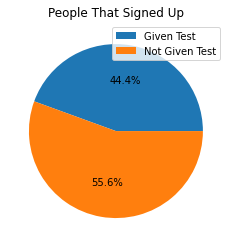

450

In [53]:
# 450 people that picked up those applications followed through and signed up.
tested_and_purchased = tested_and_app[tested_and_app.purchase_date.notnull()]
notest_and_purchased = notest_and_app[notest_and_app.purchase_date.notnull()]
plt.pie([len(tested_and_purchased), len(notest_and_purchased)], autopct='%0.1f%%')
plt.title('People That Signed Up')
plt.legend(['Given Test', 'Not Given Test'])
plt.show()
len(tested_and_purchased) + len(notest_and_purchased)

## Calculate the statistical significance of memberships

Calculate if the difference between the following groups is statistically significant: 
- The customers that picked up an application and took a fitness test.
- The customers that did not take a fitness test and picked up an application.

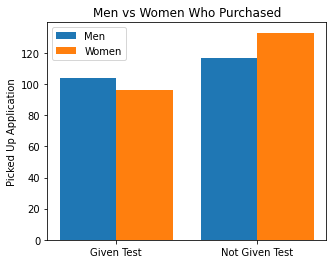

In [54]:
# Same comparison between men and women but with who actually followed through, with women
# still having a much more drastic change not being given a test
tested_purchased_men = tested_and_purchased[tested_and_purchased.gender == 'male']
notest_purchased_men = notest_and_purchased[notest_and_purchased.gender == 'male']
tested_purchased_women = tested_and_purchased[tested_and_purchased.gender == 'female']
notest_purchased_women = notest_and_purchased[notest_and_purchased.gender == 'female']

men_purchases = [len(tested_purchased_men), len(notest_purchased_men)]
women_purchases = [len(tested_purchased_women), len(notest_purchased_women)]

plt.figure(figsize=(5,4))
plt.bar(men_x, men_purchases)
plt.bar(women_x, women_purchases)
plt.title('Men vs Women Who Purchased')
plt.legend(['Men', 'Women'])

member = plt.subplot(1,1,1)
member.set_xticks(men_women_x)
member.set_xticklabels(['Given Test', 'Not Given Test'])
plt.ylabel('Picked Up Application')


plt.show()

# Detemine the count of all memberships

Previously, you looked at what percentage of people who picked up applications purchased memberships. 

Now, determine what percentage of ALL visitors purchased memberships. 

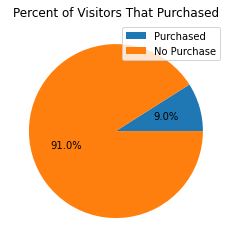

In [55]:
# Only 9% of visitors coming in are actually signing up.
visitors_purchased = all_data[all_data.purchase_date.notnull()]
visitors_no_purchase = all_data[all_data.purchase_date.isnull()]
plt.pie([len(visitors_purchased), len(visitors_no_purchase)], autopct='%0.1f%%')
plt.title('Percent of Visitors That Purchased')
plt.legend(['Purchased', 'No Purchase'])

plt.show()


## Calculate the statistical significance between groups

Determine if there is a significant difference in memberships between Group A and Group B.

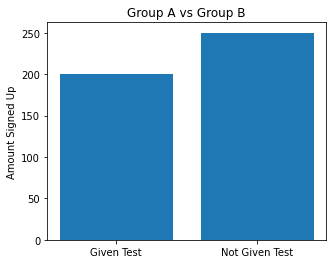

In [60]:
# Sign up difference between those who took a fitness test and those who didn't.

purch_vis_test = visitors_purchased[visitors_purchased.fitness_test_date.notnull()]
purch_vis = visitors_purchased[visitors_purchased.fitness_test_date.isnull()]

p_lst = [len(purch_vis_test), len(purch_vis)]

plt.figure(figsize=(5,4))
plt.bar(range(2), p_lst)
plt.title('Group A vs Group B')
plt.ylabel('Amount Signed Up')

pfig = plt.subplot(111)
pfig.set_xticks(range(2))
pfig.set_xticklabels(['Given Test', 'Not Given Test'])

plt.show()

## Visualize the results

Create visualizations for Janet that show the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:

- Percent of visitors who apply.
- Percent of applicants who purchase a membership.
- Percent of visitors who purchase a membership.

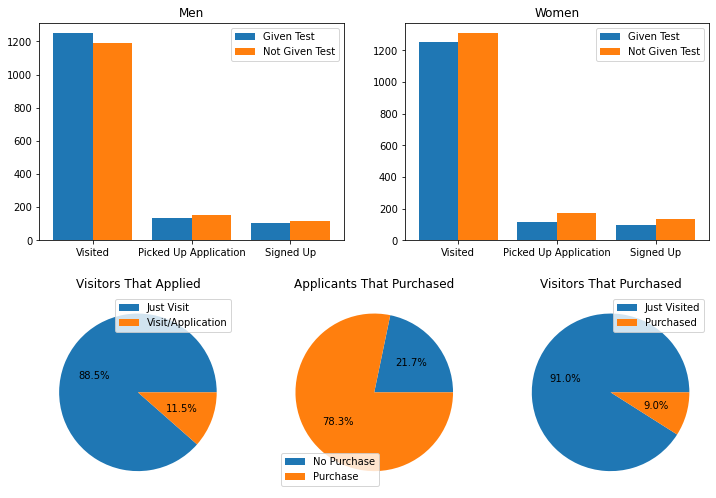

In [108]:
# We see a clear difference showing that letting people just join themselves proves to be more
# effective vs testing them first, although on a side note, men seem more inclined to take commit
# when given a fitness test.
plt.figure(figsize=(12,8))

test_x = create_x(2, .8, 1, 3)
notest_x = create_x(2, .8, 2, 3)
test_notest_x = [(a + b) / 2.0 for a, b in zip(test_x, notest_x)]
men_visited = all_data[all_data.gender == 'male']
women_visited = all_data[all_data.gender == 'female']
men_applied = men_visited[men_visited.application_date.notnull()]
women_applied = women_visited[women_visited.application_date.notnull()]
men_purch = men_visited[men_visited.purchase_date.notnull()]
women_purch = women_visited[women_visited.purchase_date.notnull()]
app_nopurchs = len(all_data[all_data.application_date.notnull()]) - len(all_data[all_data.purchase_date.notnull()])

def tested(x):
    return x[x.fitness_test_date.notnull()]
def notest(x):
    return x[x.fitness_test_date.isnull()]

# bar chart of men who tested/didn't test and visited, applied, purchased
plt.subplot(221)
plt.bar(test_x, [len(tested(men_visited)), len(tested(men_applied)), len(tested(men_purch))])
plt.bar(notest_x, [len(notest(men_visited)), len(notest(men_applied)), len(notest(men_purch))])
plt.legend(['Given Test', 'Not Given Test'])
plt.title('Men')

a = plt.subplot(221)
a.set_xticks(test_notest_x)
a.set_xticklabels(['Visited', 'Picked Up Application', 'Signed Up'])

# bar chart  of women who tested/didn't test and visited, applied, purchased
plt.subplot(222)
plt.bar(test_x, [len(tested(women_visited)), len(tested(women_applied)), len(tested(women_purch))])
plt.bar(notest_x, [len(notest(women_visited)), len(notest(women_applied)), len(notest(women_purch))])
plt.legend(['Given Test', 'Not Given Test'])
plt.title('Women')

b = plt.subplot(222)
b.set_xticks(test_notest_x)
b.set_xticklabels(['Visited', 'Picked Up Application', 'Signed Up'])

# pie chart of visitors who applied
plt.subplot(234)
plt.pie([len(all_data[all_data.application_date.isnull()]), \
         len(all_data[all_data.application_date.notnull()])], autopct='%0.1f%%')
plt.title('Visitors That Applied')
plt.legend(['Just Visit', 'Visit/Application'])

# pie chart of aplicants who purchased
plt.subplot(235)
plt.pie([app_nopurchs, len(all_data[all_data.purchase_date.notnull()])], autopct='%0.1f%%')
plt.title('Applicants That Purchased')
plt.legend(['No Purchase', 'Purchase'])

# pie chart of visitors who purchased
plt.subplot(236)
plt.pie([len(all_data[all_data.purchase_date.isnull()]), \
         len(all_data[all_data.purchase_date.notnull()])], autopct='%0.1f%%')
plt.title('Visitors That Purchased')
plt.legend(['Just Visited', 'Purchased'])

plt.subplots_adjust(bottom=.05)
plt.show()

## Congratulations!!

Congratulations, your work has been a valuable contribution for Janet to determine MuscleHub's membership process. Janet asks if you would also help her share your work with a presentation. 

## Challenge Assignment

- Develop a presentation that demonstrates your findings to Janet. She has decided that your recommendation will determine if potential customers should take a fitness test as a component of their application. Your presentation should include the following:
    - A title slide
    - A description of what happened in this A/B test
    - A summary of your dataset and any information you think would be helpful background
    - The results of the three hypothesis tests that you ran, including an explanation of the type of test that you used and why it was appropriate
    - A summary of the qualitative data
    - A recommendation for MuscleHub

- Create a [wordcloud](https://pypi.org/project/wordcloud/) visualization that Janet can use to create an ad for the MuscleHub Gym with the data in `interviews.txt`. 